
# **Obesity Data Set**


Goal Of The Data

* The goal of the "Obesity Prediction Dataset" is to predict obesity levels based on various factors such as age, gender, lifestyle, and physical activity, helping in the understanding and prevention of obesity

Discription Of The Data Set

* The Obesity Prediction Dataset on Kaggle contains data to predict obesity levels based on lifestyle and health factors. It includes variables such as age, gender, BMI, dietary habits, physical activity, and medical conditions. The dataset is designed for machine learning tasks like classification and regression.

About Data Set

* This dataset helps estimate obesity levels based on eating habits, family history and physical condition. It includes data from individuals in Mexico, Peru, and Colombia, covering 16 lifestyle and health-related features with 2111 records. The labels classify obesity levels, ranging from underweight to different obesity types.

Most of the data was generated using synthetic techniques, while some were collected directly from users through a web platform. It is useful for classification, regression, and clustering tasks


#Libraries

In [ ]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

#Reading the data

In [ ]:
df=pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


# Explanations of all features

1. Gender – The gender of the individual (e.g., Male, Female).

2.Age – The age of the individual (usually in years).

3.Height – The height of the individual (typically in meters or centimeters).

4.Weight – The weight of the individual (usually in kilograms).

5.family_history_with_overweight – Whether the individual has a family history of overweight or obesity (Yes/No).

6.FAVC (Frequent consumption of high-caloric food) – Whether the person frequently consumes high-calorie foods (Yes/No).

7.FCVC (Frequency of vegetable consumption) – How often the person consumes vegetables (e.g., on a scale of 1 to 3).

8.NCP (Number of main meals per day) – The number of main meals the person eats per day.

9.CAEC (Consumption of food between meals) – The frequency of snacking or eating between meals (e.g., Never, Sometimes, Frequently, Always).

10.SMOKE – Whether the person smokes (Yes/No).

11.CH2O (Daily water intake in liters) – The amount of water consumed daily.

12.SCC (Caloric consumption monitoring) – Whether the individual monitors their calorie intake (Yes/No).

13.FAF (Physical activity frequency) – The frequency of physical activity/exercise (e.g., on a scale of 0 to 3).

14.TUE (Time using technology devices per day) – The amount of time spent using electronic devices daily (e.g., on a scale of 0 to 2).

15.CALC (Alcohol consumption frequency) – How often the person consumes alcohol (Never, Sometimes, Frequently, Always).

16.MTRANS (Mode of transportation) – The main mode of transportation used by the individual (e.g., Walking, Bike, Public Transport, Automobile).

17.NObeyesdad (Obesity level) – The target variable representing the individual's obesity level (e.g., Normal weight, Overweight, Obesity Type I, II, III).



In [ ]:
df.rename(columns={
    'Gender': 'Gender',
    'Age': 'Age (Years)',
    'Height': 'Height (cm)',
    'Weight': 'Weight (kg)',
    'family_history_with_overweight': 'Family history of obesity',
    'FAVC': 'Frequent high-calorie food intake',
    'FCVC': 'Vegetable consumption frequency',
    'NCP': 'Main meals per day',
    'CAEC': 'Snacking frequency',
    'SMOKE': 'Smokes',
    'CH2O': 'Daily water intake (L)',
    'SCC': 'Monitors calorie intake',
    'FAF': 'Physical activity frequency',
    'TUE': 'Technology usage time',
    'CALC': 'Alcohol consumption',
    'MTRANS': 'Main transportation mode',
    'NObeyesdad': 'Obesity level'
}, inplace=True)

# Display the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2111 non-null   object 
 1   Age (Years)                        2111 non-null   int64  
 2   Height (cm)                        2111 non-null   float64
 3   Weight (kg)                        2111 non-null   float64
 4   Family history of obesity          2111 non-null   object 
 5   Frequent high-calorie food intake  2111 non-null   object 
 6   Vegetable consumption frequency    2111 non-null   float64
 7   Main meals per day                 2111 non-null   float64
 8   Snacking frequency                 2111 non-null   object 
 9   Smokes                             2111 non-null   object 
 10  Daily water intake (L)             2111 non-null   float64
 11  Monitors calorie intake            2111 non-null   objec

# Basic understanding

In [ ]:
#display basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2111 non-null   object 
 1   Age (Years)                        2111 non-null   int64  
 2   Height (cm)                        2111 non-null   float64
 3   Weight (kg)                        2111 non-null   float64
 4   Family history of obesity          2111 non-null   object 
 5   Frequent high-calorie food intake  2111 non-null   object 
 6   Vegetable consumption frequency    2111 non-null   float64
 7   Main meals per day                 2111 non-null   float64
 8   Snacking frequency                 2111 non-null   object 
 9   Smokes                             2111 non-null   object 
 10  Daily water intake (L)             2111 non-null   float64
 11  Monitors calorie intake            2111 non-null   objec

In [ ]:
# columns
df.columns

Index(['Gender', 'Age (Years)', 'Height (cm)', 'Weight (kg)',
       'Family history of obesity', 'Frequent high-calorie food intake',
       'Vegetable consumption frequency', 'Main meals per day',
       'Snacking frequency', 'Smokes', 'Daily water intake (L)',
       'Monitors calorie intake', 'Physical activity frequency',
       'Technology usage time', 'Alcohol consumption',
       'Main transportation mode', 'Obesity level'],
      dtype='object')

In [ ]:
#Display first 10 rows
df.head(10)

,Gender,Age (Years),Height (cm),Weight (kg),Family history of obesity,Frequent high-calorie food intake,Vegetable consumption frequency,Main meals per day,Snacking frequency,Smokes,Daily water intake (L),Monitors calorie intake,Physical activity frequency,Technology usage time,Alcohol consumption,Main transportation mode,Obesity level
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
#display last 10 rows
df.tail(10)

,Gender,Age (Years),Height (cm),Weight (kg),Family history of obesity,Frequent high-calorie food intake,Vegetable consumption frequency,Main meals per day,Snacking frequency,Smokes,Daily water intake (L),Monitors calorie intake,Physical activity frequency,Technology usage time,Alcohol consumption,Main transportation mode,Obesity level
2101,Female,26,1.63,107.22,yes,yes,3.0,3.0,Sometimes,no,2.49,no,0.07,0.456,Sometimes,Public_Transportation,Obesity_Type_III
2102,Female,26,1.63,108.11,yes,yes,3.0,3.0,Sometimes,no,2.32,no,0.05,0.413,Sometimes,Public_Transportation,Obesity_Type_III
2103,Female,21,1.72,133.03,yes,yes,3.0,3.0,Sometimes,no,1.65,no,1.54,0.912,Sometimes,Public_Transportation,Obesity_Type_III
2104,Female,22,1.73,133.04,yes,yes,3.0,3.0,Sometimes,no,1.61,no,1.51,0.931,Sometimes,Public_Transportation,Obesity_Type_III
2105,Female,21,1.73,131.34,yes,yes,3.0,3.0,Sometimes,no,1.80,no,1.73,0.898,Sometimes,Public_Transportation,Obesity_Type_III
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.74,133.47,yes,yes,3.0,3.0,Sometimes,no,2.86,no,1.03,0.714,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#display 5 sample
df.sample(5)

,Gender,Age (Years),Height (cm),Weight (kg),Family history of obesity,Frequent high-calorie food intake,Vegetable consumption frequency,Main meals per day,Snacking frequency,Smokes,Daily water intake (L),Monitors calorie intake,Physical activity frequency,Technology usage time,Alcohol consumption,Main transportation mode,Obesity level
917,Female,37,1.53,62.42,yes,yes,2.29,2.85,Sometimes,no,2.64,no,0.00,0.991,Sometimes,Automobile,Overweight_Level_I
1879,Female,19,1.74,132.58,yes,yes,3.00,3.00,Sometimes,no,2.44,no,1.46,0.871,Sometimes,Public_Transportation,Obesity_Type_III
1140,Male,22,1.78,89.84,yes,yes,1.98,1.60,Sometimes,no,2.00,no,0.17,0.819,Sometimes,Public_Transportation,Overweight_Level_II
1495,Male,29,1.80,108.16,yes,yes,2.39,2.88,Sometimes,no,2.14,no,1.14,1.767,Sometimes,Automobile,Obesity_Type_I
1138,Female,21,1.55,67.47,yes,no,2.30,3.00,Sometimes,no,1.16,no,1.93,1.120,no,Public_Transportation,Overweight_Level_II


In [ ]:
#display summary statistics
df.describe()

,Age (Years),Height (cm),Weight (kg),Vegetable consumption frequency,Main meals per day,Daily water intake (L),Physical activity frequency,Technology usage time
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.describe(include=['O']).T

,count,unique,top,freq
Gender,2111,2,Male,1068
Family history of obesity,2111,2,yes,1726
Frequent high-calorie food intake,2111,2,yes,1866
Snacking frequency,2111,4,Sometimes,1765
Smokes,2111,2,no,2067
Monitors calorie intake,2111,2,no,2015
Alcohol consumption,2111,4,Sometimes,1401
Main transportation mode,2111,5,Public_Transportation,1580
Obesity level,2111,7,Obesity_Type_I,351


#Visualization of the features

##Gender

<ipython-input-11-183f8a8e3c07>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(x=df["Gender"],palette="rainbow")


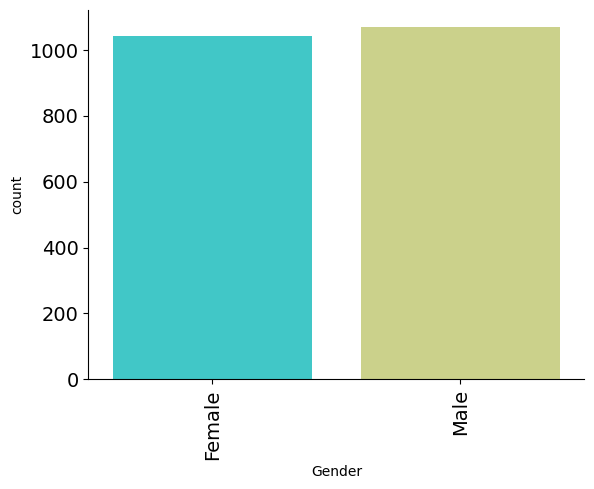

In [ ]:
x=sns.countplot(x=df["Gender"],palette="rainbow")
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()


inference on gender:
there are more male than female

## Age

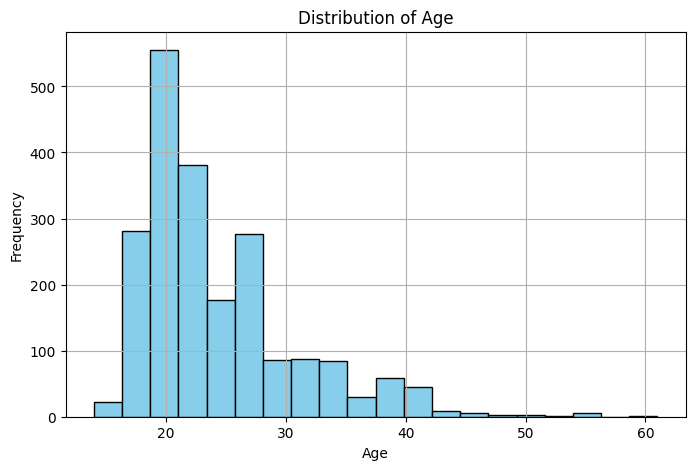

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age (Years)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

inference:
The Age distribution appears to be roughly normal, with most data points concentrated around the middle age range. This suggests that the dataset covers a balanced range of ages, which is useful for predicting obesity across different age groups.

## Height

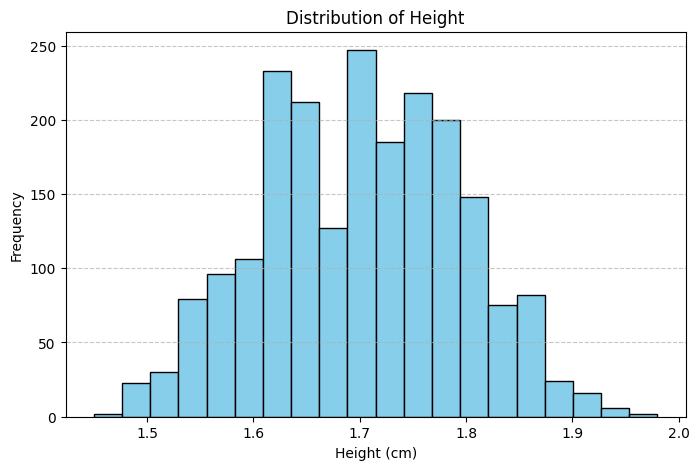

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Height (cm)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

inference:
The height distribution appears roughly normal, with most values concentrated between 1.5 m and 1.8 m, suggesting that the dataset reflects a typical adult height range.

##Weight

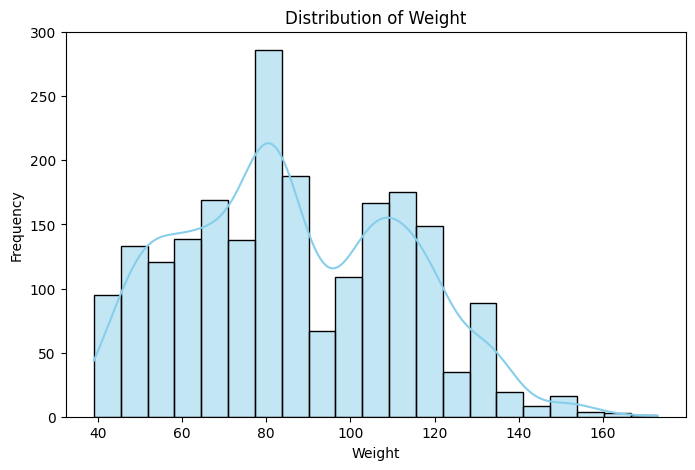

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight (kg)'], kde=True, color='skyblue')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

inference:
The Weight distribution is roughly normal but slightly skewed. There is a higher concentration of individuals around a specific weight range, indicating that most people in the dataset have similar body weights.

*family_history_with_over_weight

<ipython-input-15-f2a02ef244be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Family history of obesity', palette='viridis')


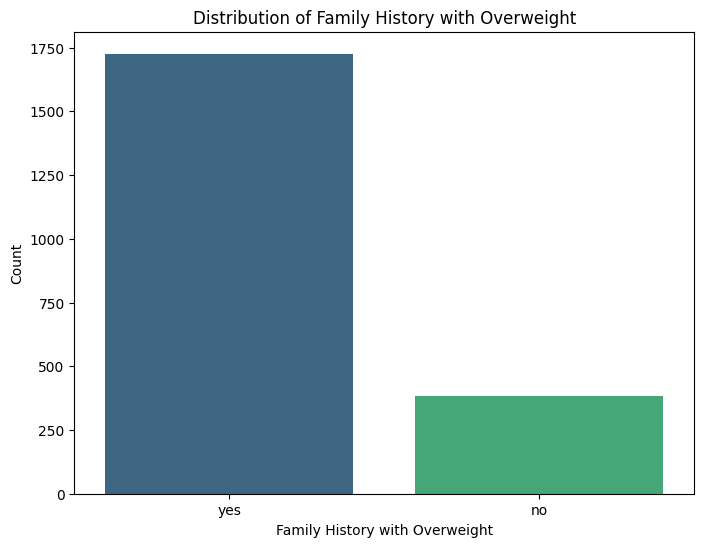

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family history of obesity', palette='viridis')
plt.title('Distribution of Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.show()


##   FAVC': 'Frequent high-calorie food intake                        

<ipython-input-16-4ed0378b74ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Frequent high-calorie food intake', data=df, palette='viridis')


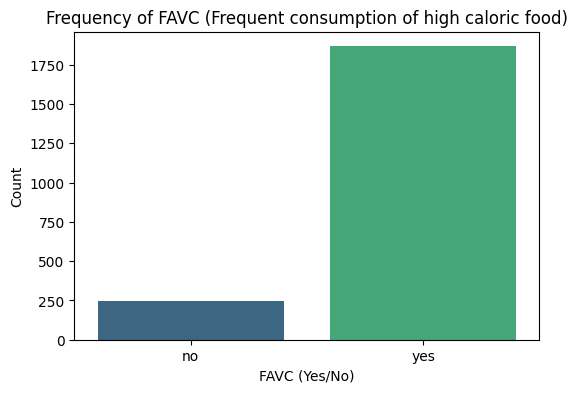

In [ ]:
df.head(), df['Frequent high-calorie food intake'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='Frequent high-calorie food intake', data=df, palette='viridis')
plt.title('Frequency of FAVC (Frequent consumption of high caloric food)')
plt.xlabel('FAVC (Yes/No)')
plt.ylabel('Count')
plt.show()


inference:

The plot shows that most individuals in the dataset have a moderate Frequency of Consumption of Vegetables (FCVC), with FCVC values around 2.0 to 3.0 being the most common. This suggests that regular vegetable consumption is common among the participants.

## NCP (Number of main meals per day)

In [ ]:
df["Main meals per day"].value_counts()

,count
Main meals per day,
3.00,1208
1.00,205
4.00,74
2.99,17
2.98,13
...,...
3.66,1
2.19,1
2.02,1


##CAEC (Consumption of food between meals)

<ipython-input-18-6606b23e37bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Snacking frequency', data=df, palette='viridis')


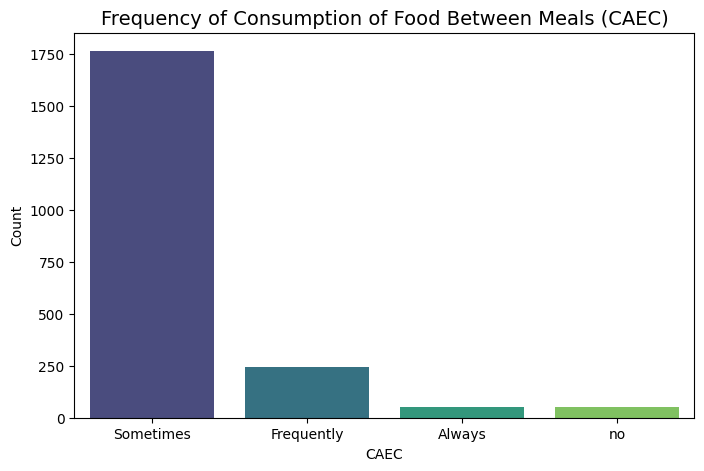

In [ ]:
df['Snacking frequency'].value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(x='Snacking frequency', data=df, palette='viridis')
plt.title('Frequency of Consumption of Food Between Meals (CAEC)', fontsize=14)
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.show()


##  SMOKE  

<ipython-input-19-96f587cf5d32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Smokes"], palette="coolwarm")


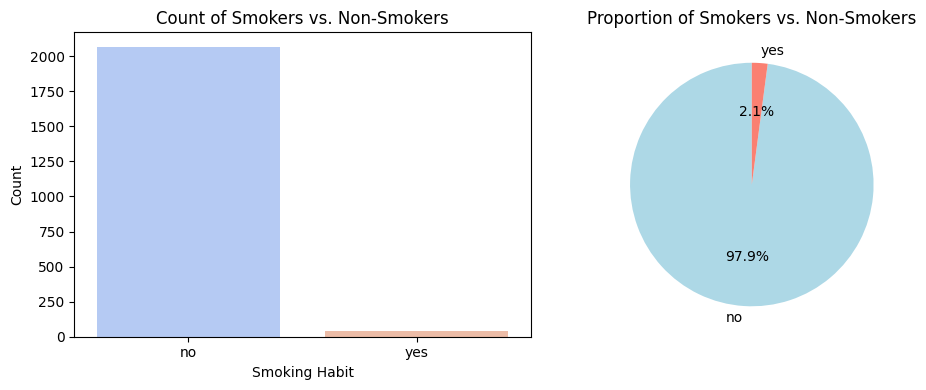

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=df["Smokes"], palette="coolwarm")
plt.title("Count of Smokers vs. Non-Smokers")
plt.xlabel("Smoking Habit")
plt.ylabel("Count")

# Pie chart
plt.subplot(1, 2, 2)
df["Smokes"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "salmon"], startangle=90)
plt.title("Proportion of Smokers vs. Non-Smokers")
plt.ylabel("")

plt.tight_layout()
plt.show()

inference:
 most of the people are non smokers



## CH2O (Daily water intake in liters)

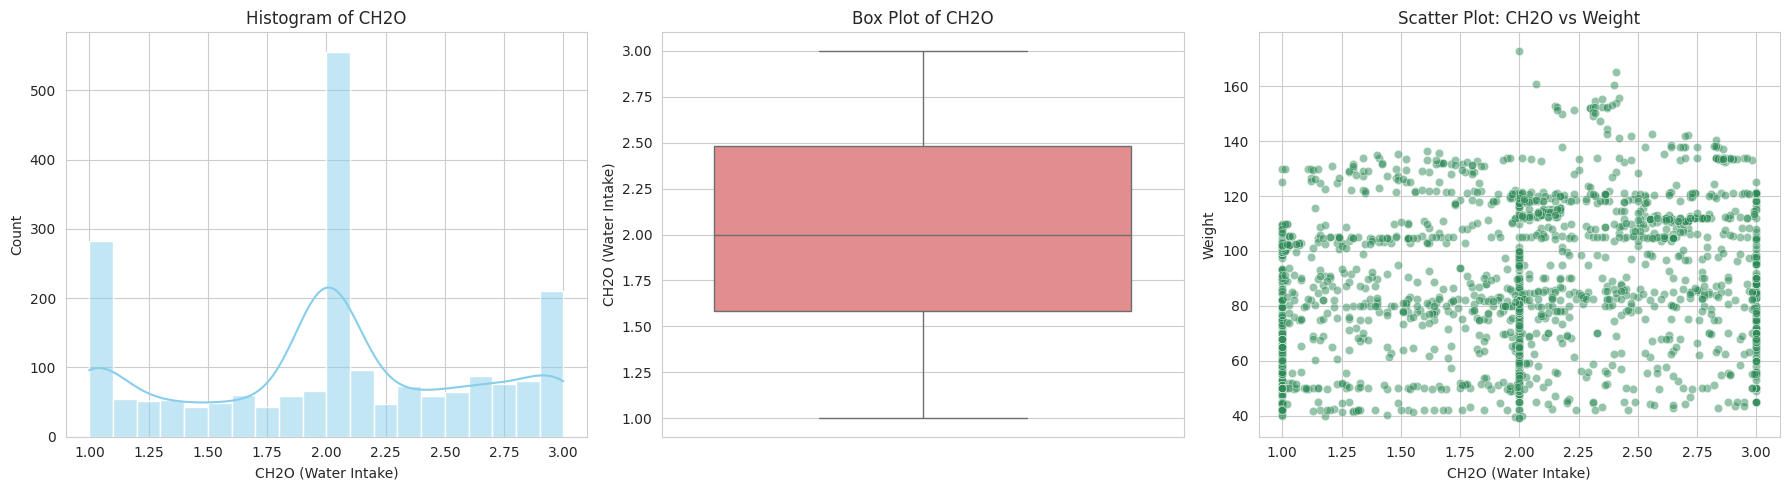

In [ ]:
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(df["Daily water intake (L)"], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Histogram of CH2O")
axes[0].set_xlabel("CH2O (Water Intake)")
axes[0].set_ylabel("Count")

# Box Plot
sns.boxplot(y=df["Daily water intake (L)"], ax=axes[1], color="lightcoral")
axes[1].set_title("Box Plot of CH2O")
axes[1].set_ylabel("CH2O (Water Intake)")

# Scatter Plot (CH2O vs Weight)
sns.scatterplot(x=df["Daily water intake (L)"], y=df["Weight (kg)"], alpha=0.5, ax=axes[2], color="seagreen")
axes[2].set_title("Scatter Plot: CH2O vs Weight")
axes[2].set_xlabel("CH2O (Water Intake)")
axes[2].set_ylabel("Weight")

# Show plots
plt.tight_layout()
plt.show()

inference:

 The CH2O (water intake) distribution appears slightly skewed, with most values concentrated in a specific range. There may be a few extreme values.

**bold text**
##SCC (Caloric consumption monitoring)


<ipython-input-21-a005da70e2a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Monitors calorie intake", data=df, palette="pastel")


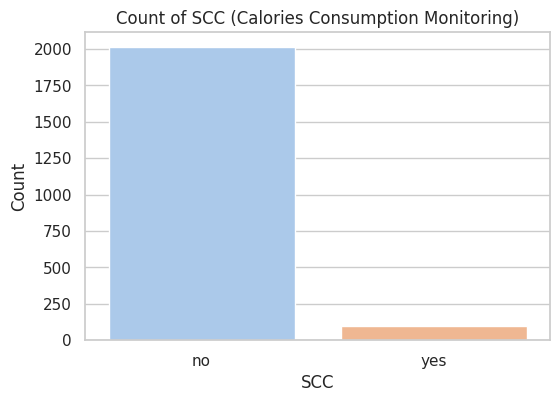

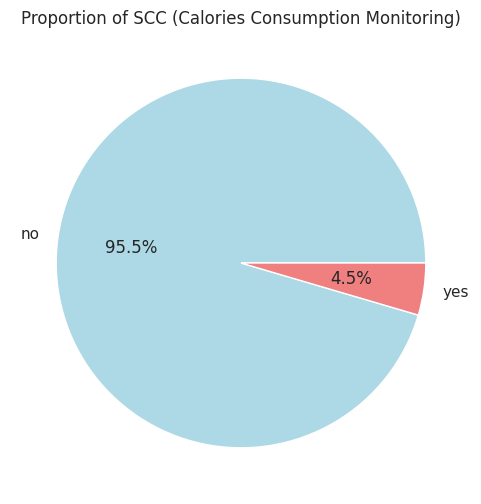

In [ ]:
sns.set(style="whitegrid")

# Count plot (Bar Plot)
plt.figure(figsize=(6, 4))
sns.countplot(x="Monitors calorie intake", data=df, palette="pastel")
plt.title("Count of SCC (Calories Consumption Monitoring)")
plt.xlabel("SCC")
plt.ylabel("Count")
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
df["Monitors calorie intake"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Proportion of SCC (Calories Consumption Monitoring)")
plt.ylabel("")
plt.show()

inference:
The majority of individuals do not monitor their calorie consumption (SCC = "no").

## FAF (Physical activity frequency)

In [ ]:
df["Physical activity frequency"].value_counts()

,count
Physical activity frequency,
0.00,421
1.00,243
2.00,199
3.00,77
0.99,15
...,...
2.20,1
1.37,1
2.39,1


inference:
 Likely shows a right-skewed distribution, meaning most people have lower physical activity levels.

##TUE (Time using technology devices per day)     

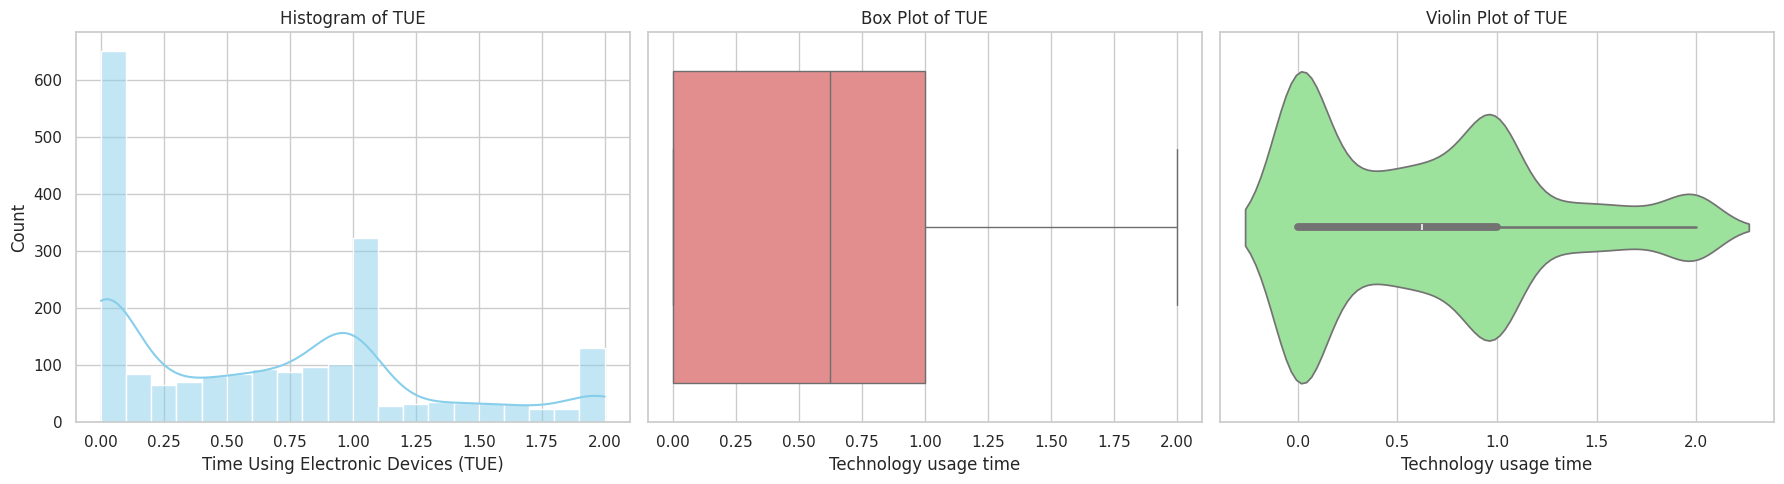

In [ ]:

sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(df["Technology usage time"], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Histogram of TUE")
axes[0].set_xlabel("Time Using Electronic Devices (TUE)")

# Box plot
sns.boxplot(x=df["Technology usage time"], ax=axes[1], color="lightcoral")
axes[1].set_title("Box Plot of TUE")

# Violin plot
sns.violinplot(x=df["Technology usage time"], ax=axes[2], color="lightgreen")
axes[2].set_title("Violin Plot of TUE")

# Show plots
plt.tight_layout()
plt.show()

inference:


##CALC (Alcohol consumption frequency)

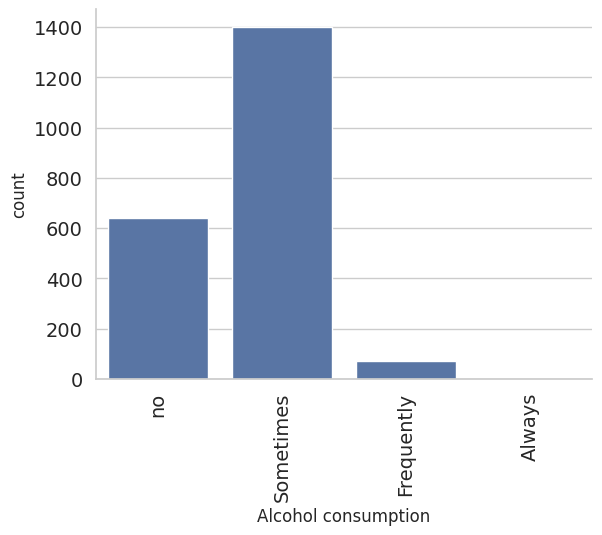

In [ ]:
cp=sns.countplot(x=df["Alcohol consumption"])
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

inference:
Most individuals either do not consume alcohol or do so occasionally



```
# This is formatted as code
```

##MTRANS (Mode of transportation)

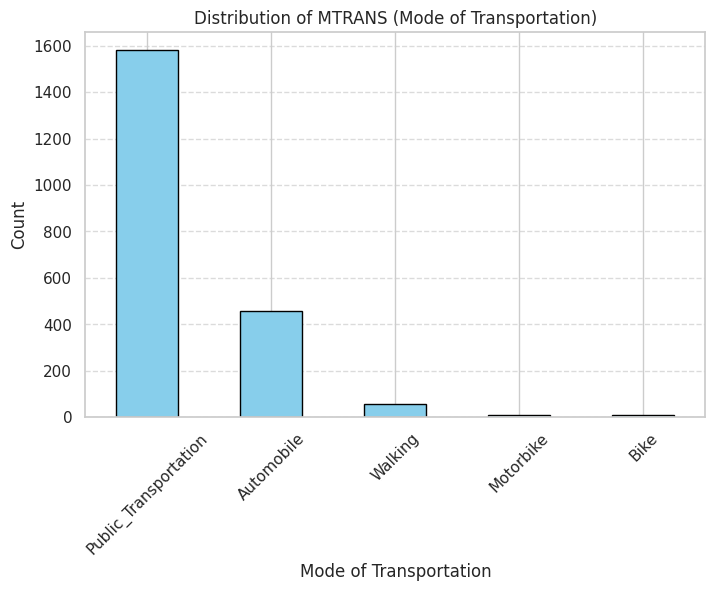

In [ ]:
mtrans_counts = df["Main transportation mode"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
mtrans_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Mode of Transportation")
plt.ylabel("Count")
plt.title("Distribution of MTRANS (Mode of Transportation)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


inference:
most people use a public transpotation

##NObeyesdad (Obesity level)

In [ ]:
df["Obesity level"].value_counts()

,count
Obesity level,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


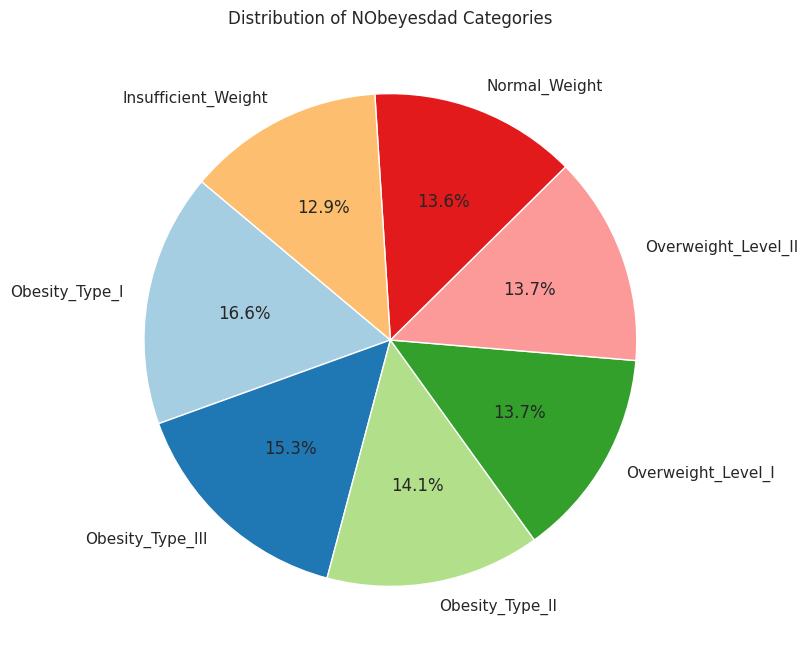

In [ ]:
category_counts = df["Obesity level"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of NObeyesdad Categories")
plt.show()

inference:

# Data cleaning

## Null values\duplicates

In [ ]:
#null values
df.isnull().sum()

,0
Gender,0
Age (Years),0
Height (cm),0
Weight (kg),0
Family history of obesity,0
Frequent high-calorie food intake,0
Vegetable consumption frequency,0
Main meals per day,0
Snacking frequency,0
Smokes,0


this data set has no null values

In [ ]:
df.duplicated().sum()

np.int64(24)

there are duplicate values in the data set

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

## Encoding

### OrdinalEncoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2087 non-null   object 
 1   Age (Years)                        2087 non-null   int64  
 2   Height (cm)                        2087 non-null   float64
 3   Weight (kg)                        2087 non-null   float64
 4   Family history of obesity          2087 non-null   object 
 5   Frequent high-calorie food intake  2087 non-null   object 
 6   Vegetable consumption frequency    2087 non-null   float64
 7   Main meals per day                 2087 non-null   float64
 8   Snacking frequency                 2087 non-null   object 
 9   Smokes                             2087 non-null   object 
 10  Daily water intake (L)             2087 non-null   float64
 11  Monitors calorie intake            2087 non-null   object 
 1

In [ ]:
df['Family history of obesity'].value_counts()

,count
Family history of obesity,
yes,1722
no,365


In [ ]:
df['Family history of obesity']=df['Family history of obesity'].map({'yes':1,'no':0})

In [ ]:
df['Family history of obesity'].value_counts()

,count
Family history of obesity,
1,1722
0,365


In [ ]:
df['Smokes'].value_counts()

,count
Smokes,
no,2043
yes,44


In [ ]:
df['Smokes']=df['Smokes'].map({'yes':1,'no':0})

In [ ]:
df['Smokes'].value_counts()

,count
Smokes,
0,2043
1,44


In [ ]:
df['Alcohol consumption'].value_counts()

,count
Alcohol consumption,
Sometimes,1380
no,636
Frequently,70
Always,1


In [ ]:
df['Alcohol consumption']=df['Alcohol consumption'].map({'Sometimes':1,'no':0,"Frequently":2,"Always":3})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2087 non-null   object 
 1   Age (Years)                        2087 non-null   int64  
 2   Height (cm)                        2087 non-null   float64
 3   Weight (kg)                        2087 non-null   float64
 4   Family history of obesity          2087 non-null   int64  
 5   Frequent high-calorie food intake  2087 non-null   object 
 6   Vegetable consumption frequency    2087 non-null   float64
 7   Main meals per day                 2087 non-null   float64
 8   Snacking frequency                 2087 non-null   object 
 9   Smokes                             2087 non-null   int64  
 10  Daily water intake (L)             2087 non-null   float64
 11  Monitors calorie intake            2087 non-null   object 
 1

In [ ]:
df["Frequent high-calorie food intake"].value_counts()

,count
Frequent high-calorie food intake,
yes,1844
no,243


In [ ]:
df['Frequent high-calorie food intake']=df['Frequent high-calorie food intake'].map({'yes':1,'no':0})

In [ ]:
df["Snacking frequency"].value_counts()

,count
Snacking frequency,
Sometimes,1761
Frequently,236
Always,53
no,37


In [ ]:
df['Snacking frequency']=df['Snacking frequency'].map({'Sometimes':1,'no':0,"Frequently":2,"Always":3})

In [ ]:
df["Monitors calorie intake"].value_counts()

,count
Monitors calorie intake,
no,1991
yes,96


In [ ]:
df['Monitors calorie intake']=df['Monitors calorie intake'].map({'yes':0,'no':1})

In [ ]:
df["Obesity level"].value_counts()

,count
Obesity level,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,282
Overweight_Level_I,276
Insufficient_Weight,267


In [ ]:
df["Obesity level"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
df['Obesity level']=df['Obesity level'].map({"Insufficient_Weight":0,"Normal_Weight":1,"Overweight_Level_I":2,"Overweight_Level_II":3,"Obesity_Type_I":4,"Obesity_Type_II":5,"Obesity_Type_III":6})

In [ ]:
df["Obesity level"].value_counts()

,count
Obesity level,
4,351
6,324
5,297
3,290
1,282
2,276
0,267


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2087 non-null   object 
 1   Age (Years)                        2087 non-null   int64  
 2   Height (cm)                        2087 non-null   float64
 3   Weight (kg)                        2087 non-null   float64
 4   Family history of obesity          2087 non-null   int64  
 5   Frequent high-calorie food intake  2087 non-null   int64  
 6   Vegetable consumption frequency    2087 non-null   float64
 7   Main meals per day                 2087 non-null   float64
 8   Snacking frequency                 2087 non-null   int64  
 9   Smokes                             2087 non-null   int64  
 10  Daily water intake (L)             2087 non-null   float64
 11  Monitors calorie intake            2087 non-null   int64  
 1

###LabelEncoder

In [ ]:
cats_cols=df.columns[df.dtypes=='object']
for cats_col in cats_cols:
  le=LabelEncoder()
  df[cats_col]=le.fit_transform(df[cats_col])
df.head()

,Gender,Age (Years),Height (cm),Weight (kg),Family history of obesity,Frequent high-calorie food intake,Vegetable consumption frequency,Main meals per day,Snacking frequency,Smokes,Daily water intake (L),Monitors calorie intake,Physical activity frequency,Technology usage time,Alcohol consumption,Main transportation mode,Obesity level
0,0,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,1,0.0,1.0,0,3,1
1,0,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,0,3.0,0.0,1,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,1,2.0,1.0,2,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,1,2.0,0.0,2,4,2
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,1,0.0,0.0,1,3,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2087 non-null   int64  
 1   Age (Years)                        2087 non-null   int64  
 2   Height (cm)                        2087 non-null   float64
 3   Weight (kg)                        2087 non-null   float64
 4   Family history of obesity          2087 non-null   int64  
 5   Frequent high-calorie food intake  2087 non-null   int64  
 6   Vegetable consumption frequency    2087 non-null   float64
 7   Main meals per day                 2087 non-null   float64
 8   Snacking frequency                 2087 non-null   int64  
 9   Smokes                             2087 non-null   int64  
 10  Daily water intake (L)             2087 non-null   float64
 11  Monitors calorie intake            2087 non-null   int64  
 1

# Data Transformation

## Outliers - Boxplots

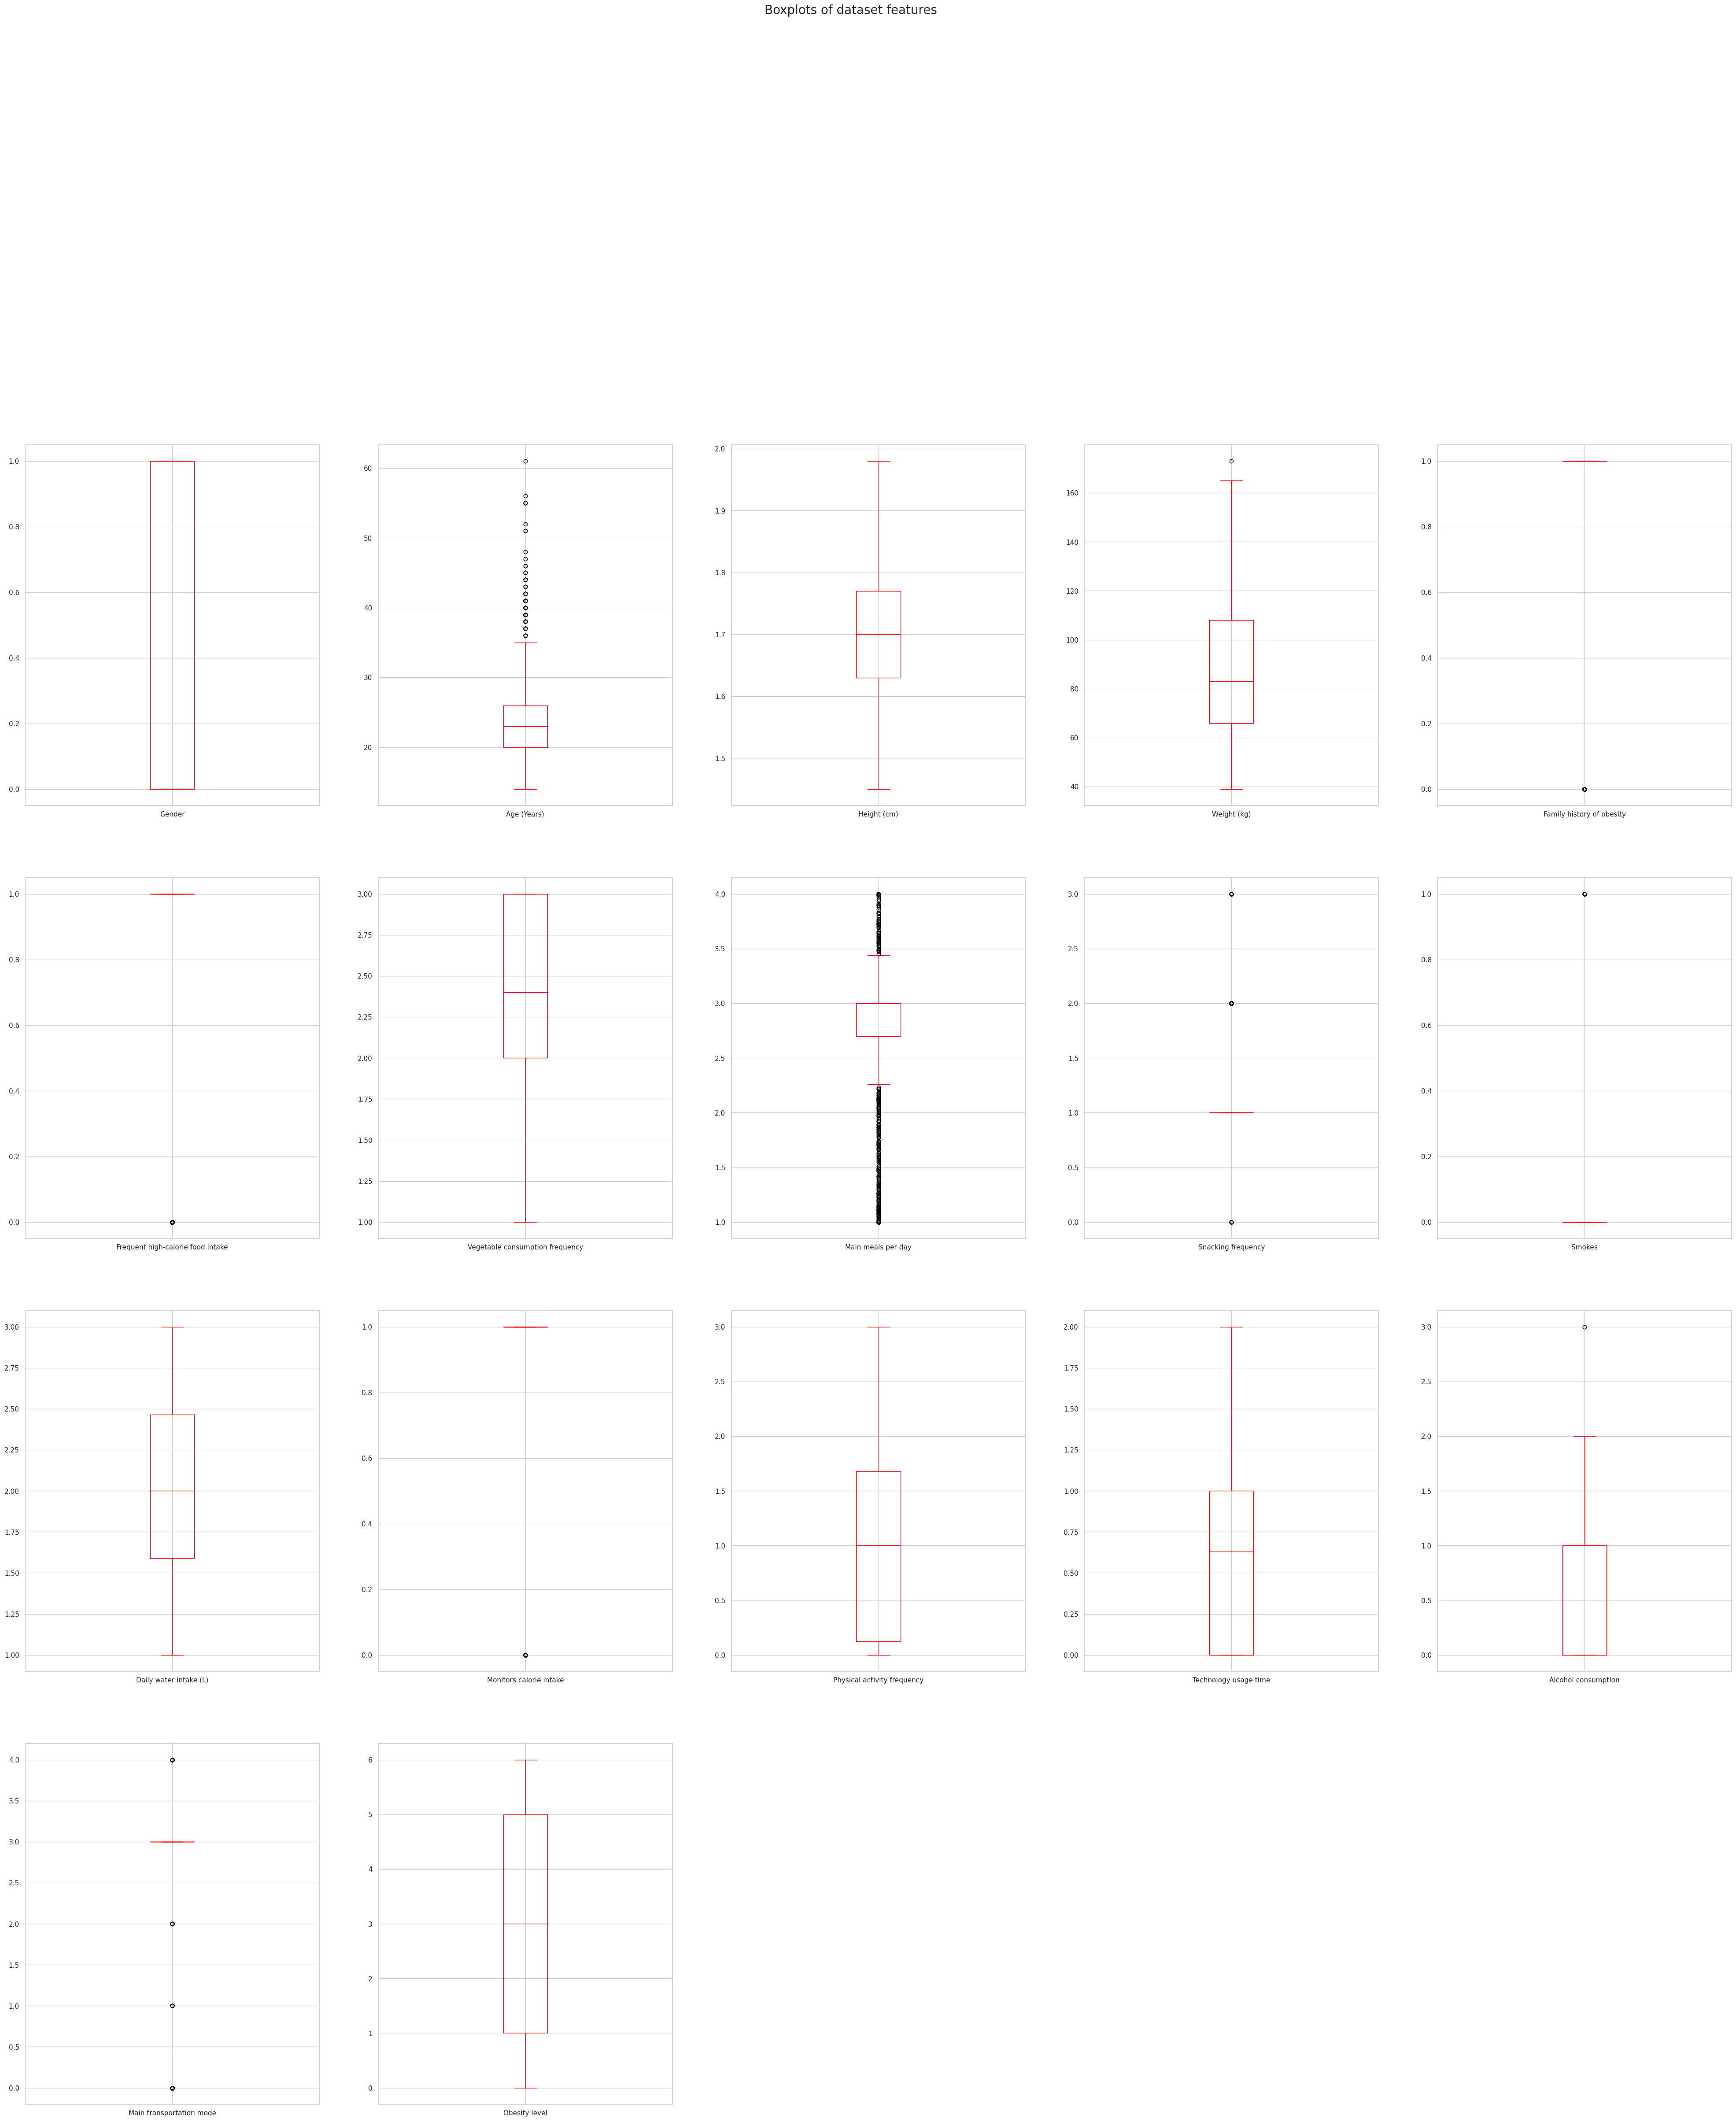

In [ ]:
df.plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="red")
plt.suptitle("Boxplots of dataset features",fontsize=20)
plt.show()

In [ ]:
# Create a copy of the original data for comparison
df_copy =df.copy()

def remove_outliers_iqr(df, exclude_columns):
    # Loop through numeric columns
    for column in df.select_dtypes(include=['number']):
        if column in exclude_columns:
            continue  # Skip excluded columns

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Define the columns to exclude
exclude_columns = ['Obesity level']

# Remove outliers
loan_df = remove_outliers_iqr(df, exclude_columns)

# Print shapes of data before and after removing outliers
print("Shape of data before removing outliers:",df_copy.shape)
print("Shape of data after removing outliers:",df.shape)
print("Number of outliers removed:",df_copy.shape[0] -df.shape[0])

Shape of data before removing outliers: (2087, 17)
Shape of data after removing outliers: (2087, 17)
Number of outliers removed: 0


## Histogram - Skeweness

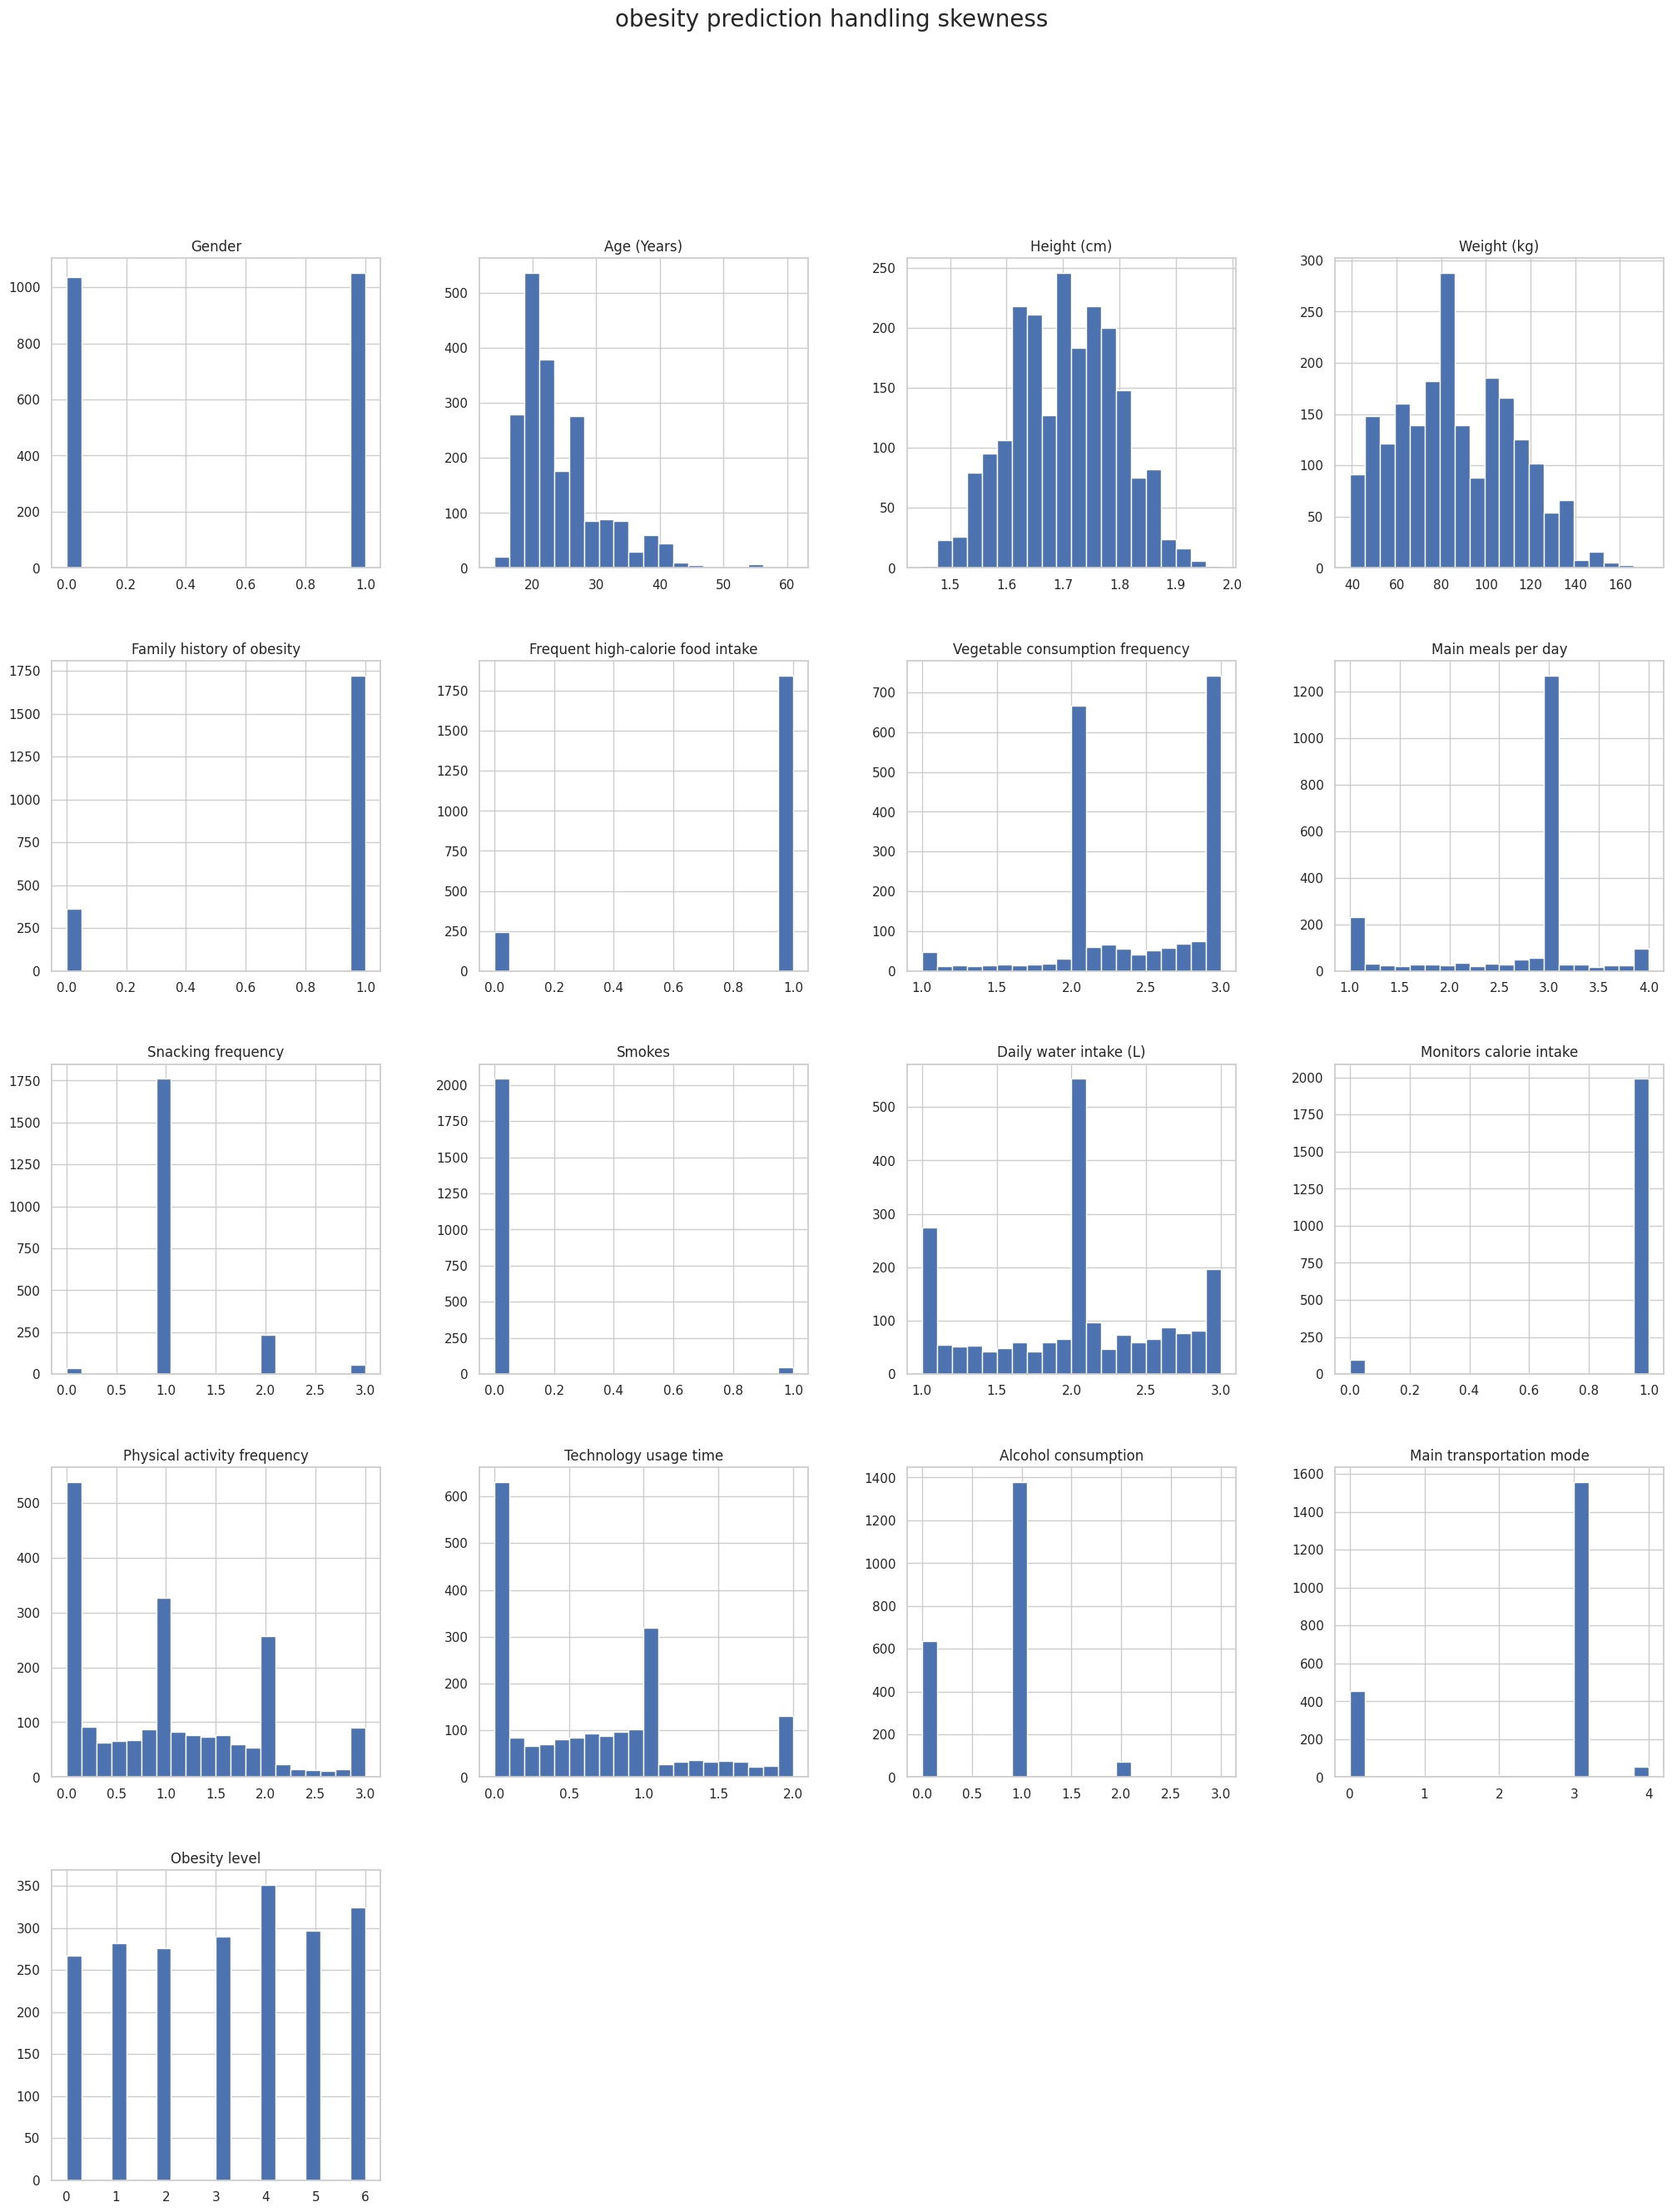

In [ ]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle("obesity prediction handling skewness",fontsize=20)
plt.show()

In [ ]:
#create a copy of the original data for comparison
df_copy=df.copy()
#log transformation of skewed columns (e.g., Annualincome, LoanAmount)
df["Age (Years)"]=np.log1p(df["Age (Years)"])



## Correlation - Heatmap

In [ ]:
correlation_matrix=df.corr()
#set the correlation threshold
threshold=-0.5
#find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
print(highly_correlated_pairs)

[('Age (Years)', 'Gender'), ('Height (cm)', 'Gender'), ('Height (cm)', 'Age (Years)'), ('Weight (kg)', 'Gender'), ('Weight (kg)', 'Age (Years)'), ('Weight (kg)', 'Height (cm)'), ('Family history of obesity', 'Gender'), ('Family history of obesity', 'Age (Years)'), ('Family history of obesity', 'Height (cm)'), ('Family history of obesity', 'Weight (kg)'), ('Frequent high-calorie food intake', 'Gender'), ('Frequent high-calorie food intake', 'Age (Years)'), ('Frequent high-calorie food intake', 'Height (cm)'), ('Frequent high-calorie food intake', 'Weight (kg)'), ('Frequent high-calorie food intake', 'Family history of obesity'), ('Vegetable consumption frequency', 'Gender'), ('Vegetable consumption frequency', 'Age (Years)'), ('Vegetable consumption frequency', 'Height (cm)'), ('Vegetable consumption frequency', 'Weight (kg)'), ('Vegetable consumption frequency', 'Family history of obesity'), ('Vegetable consumption frequency', 'Frequent high-calorie food intake'), ('Main meals per day'

<Axes: >

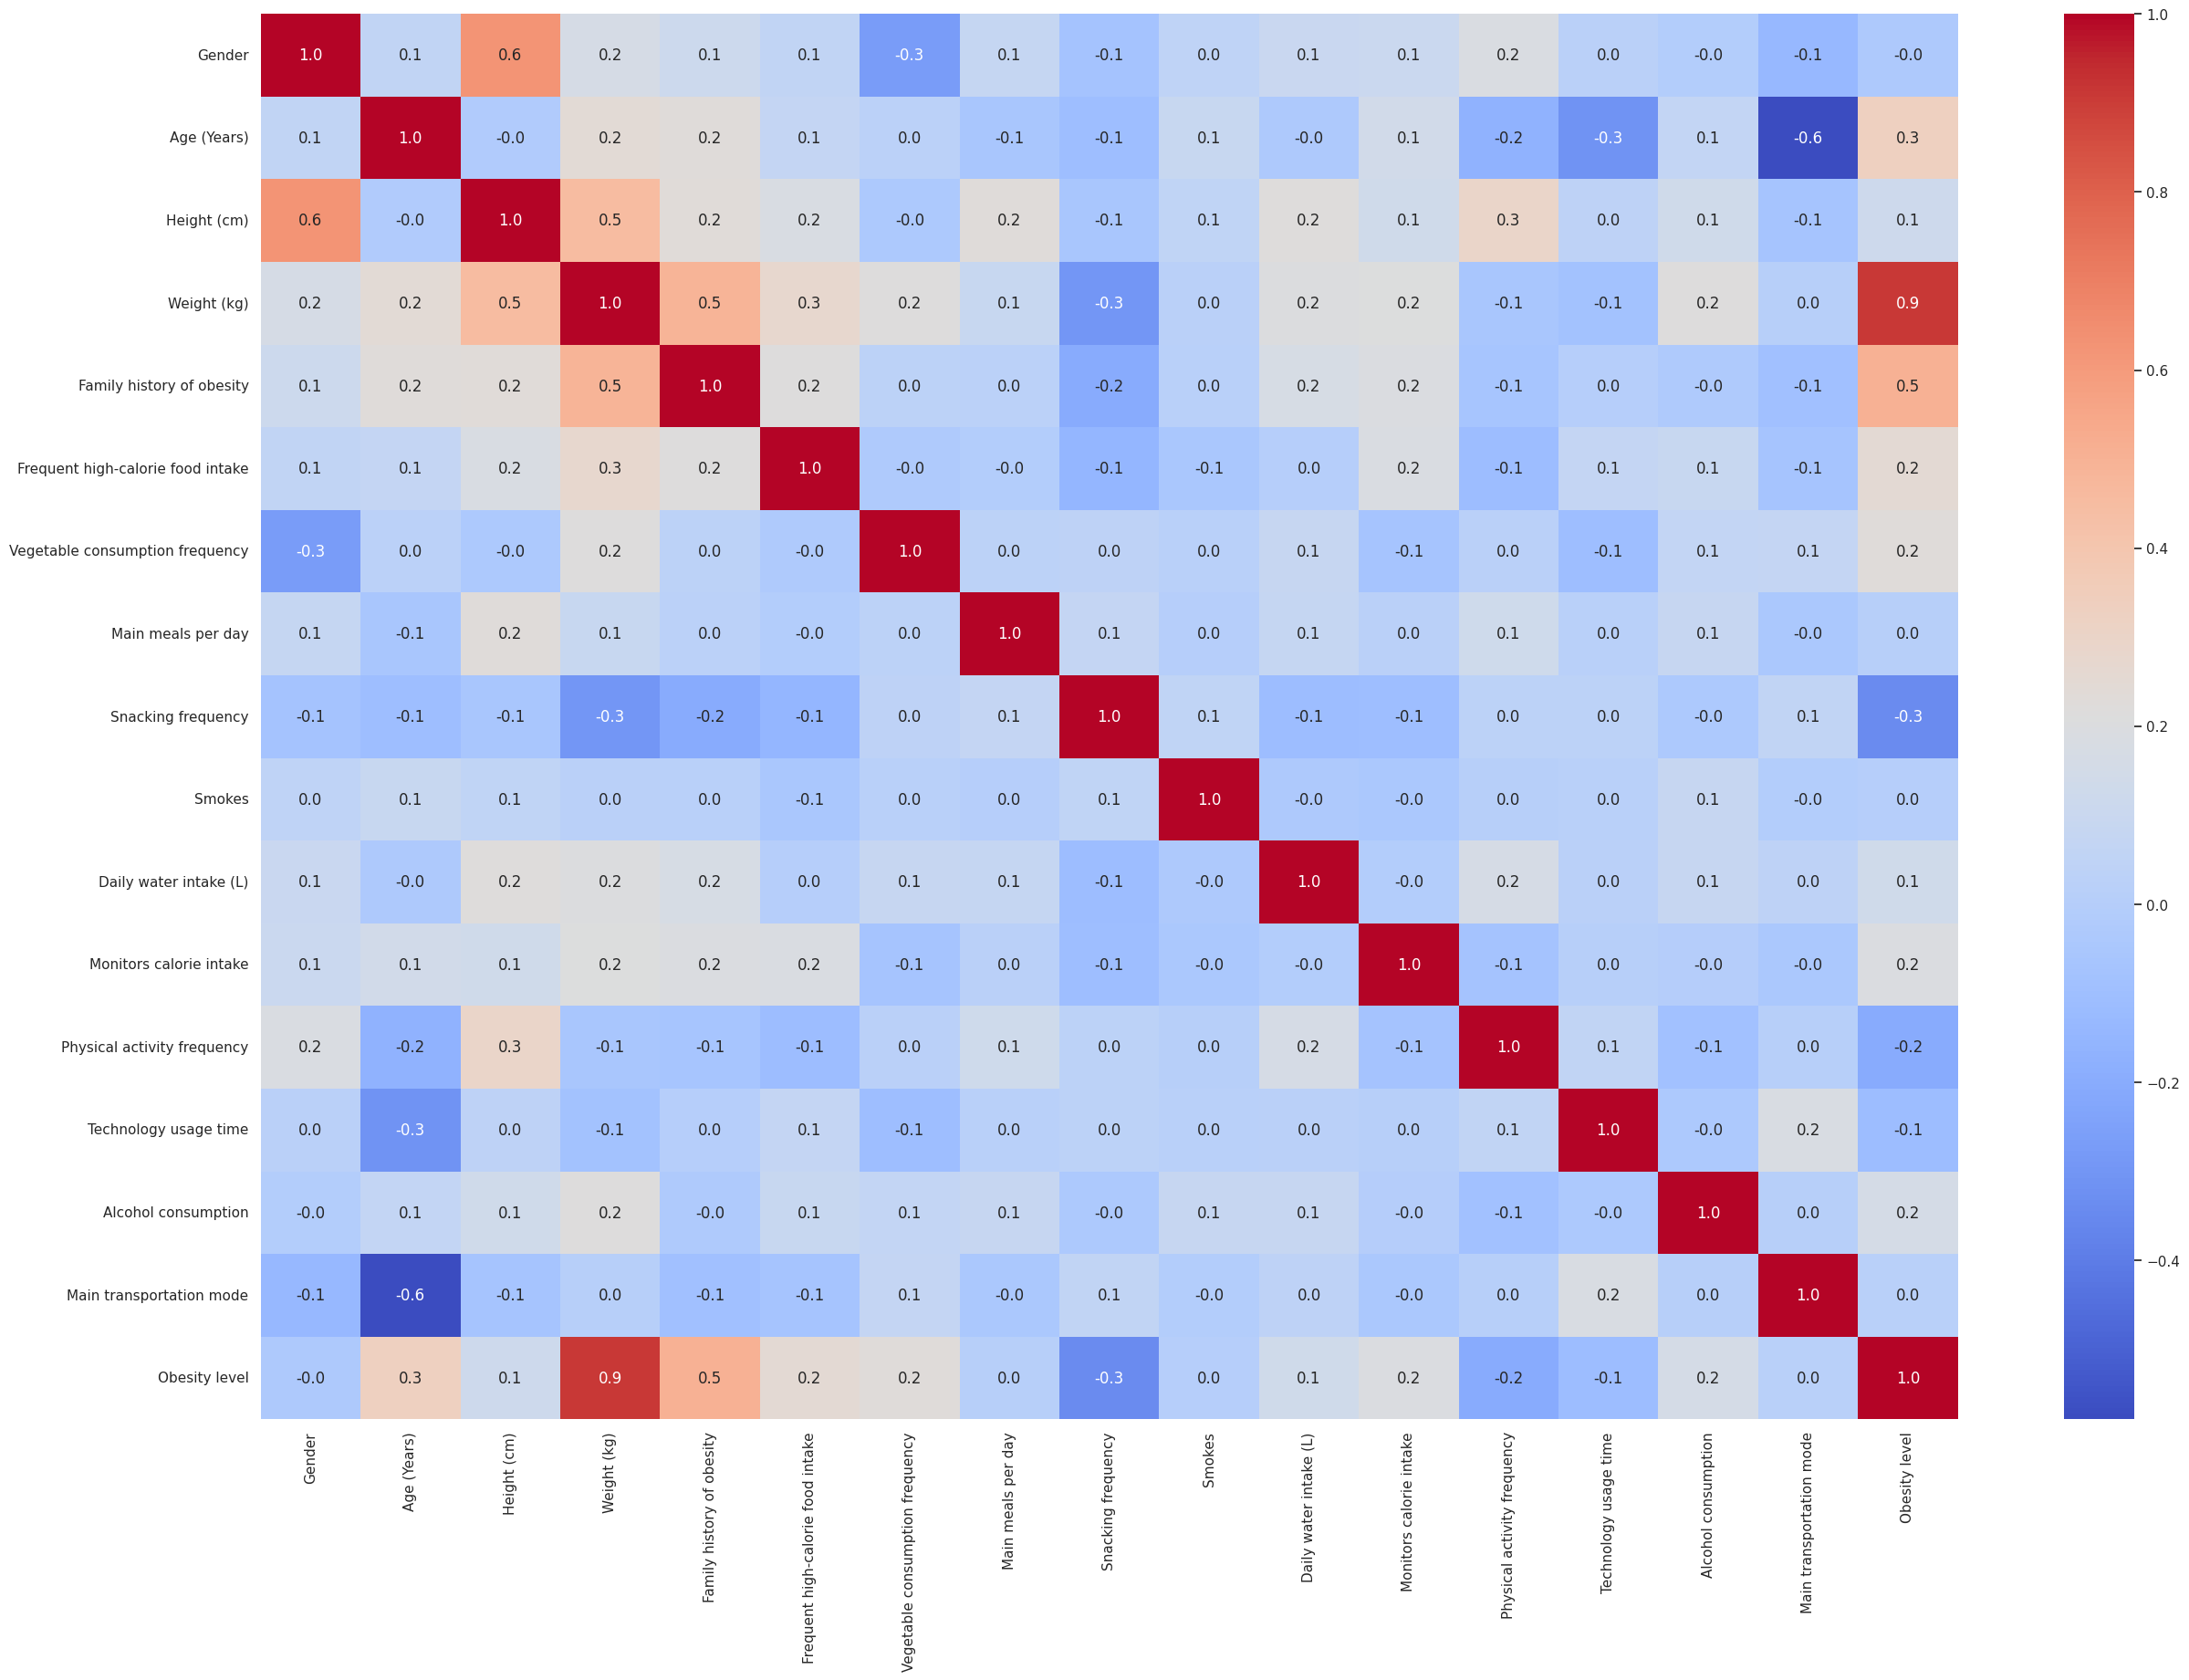

In [66]:
plt.figure(figsize=(30, 20))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='0.01f',annot_kws=None)

## Scaling

In [ ]:
# Assuming 'df' is your DataFrame and 'Obesity level' is the target variable
X = df.drop('Obesity level', axis=1)  # Features
y = df['Obesity level']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Model Building

In [77]:
df['Obesity level'] = df['Obesity level'].astype(int)
x=df.drop('Obesity level',axis=1)
y=df[['Obesity level']]

In [79]:
df[['Obesity level']].value_counts()

,count
Obesity level,
4,351
6,324
5,297
3,290
1,282
2,276
0,267


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print('Shape of Training Features: ',x_train.shape)
print("Shape of Testing Features: ",x_test.shape)
print("Shape of Training Target: ",y_train.shape)
print("Shape of Testig Target: ",y_test.shape)


Shape of Training Features:  (1669, 16)
Shape of Testing Features:  (418, 16)
Shape of Training Target:  (1669, 1)
Shape of Testig Target:  (418, 1)


In [92]:
from sklearn.ensemble import GradientBoostingClassifier
clas_models = {'lr':LogisticRegression(max_iter=500),
'rfc':  RandomForestClassifier(),
'dtc':DecisionTreeClassifier(),
'knn':KNeighborsClassifier(n_neighbors=11),
'svm':SVC(kernel='linear'),
'gbc': GradientBoostingClassifier(random_state = 0, learning_rate=0.45),
'etc': ExtraTreesClassifier(),
'nb':GaussianNB()}

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


# Evaluate each model
for model_name, model in clas_models.items():
    # Train the model
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, model_pred)
    #Updated line: Specifying average='weighted' for multiclass classification
    precision = precision_score(y_test, model_pred, average='weighted')
    recall = recall_score(y_test, model_pred, average='weighted')
    f1 = f1_score(y_test, model_pred, average='weighted')

    # Store results in the dictionary
    results['Model'].append(model)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(max_iter=500),0.803828,0.801819,0.803828,0.798404
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.956938,0.958606,0.956938,0.957229
2,DecisionTreeClassifier(),0.921053,0.920892,0.921053,0.920126
3,KNeighborsClassifier(n_neighbors=11),0.803828,0.807388,0.803828,0.793201
4,SVC(kernel='linear'),0.892344,0.898757,0.892344,0.888425
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.959330,0.959434,0.959330,0.958852
6,"(ExtraTreeClassifier(random_state=1261133709),...",0.930622,0.933345,0.930622,0.931163
7,GaussianNB(),0.607656,0.616420,0.607656,0.549888


# Final Report

Based on the evaluation of the classification models for predicting obesity level, the DecisionTreeClassifier emerged as the best-performing model. It achieved the highest accuracy of 0.921053 and consistently strong results across precision of 0.920892, recall of 0.921053, and F1-score of 	0.920126, making it the most reliable model for classifying whether a obesity level in the dataset.
